# Model Training
In this notebook, we trained 4 different EfficientNet models on the faces extracted


In [1]:
%matplotlib inline
from IPython.core.display import set_matplotlib_formats
import matplotlib
import matplotlib.pyplot as plt
import os.path
import shutil
import pandas as pd
import numpy as np
import os
import json
import gc
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
from tensorflow.keras import backend as k
from tensorflow.keras.callbacks import Callback
import tensorflow as tf
from common.model_utils import build_model, input_size

# import packages and modules for graph plotting
from pandas.plotting import table

# setup output image format (Chrome works best)
set_matplotlib_formats("svg")

class ClearMemory(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        k.clear_session()

/var/folders/6n/_1k_wx3s2fg5c_7xkb973_4h0000gn/T/ipykernel_27145/3896103227.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


In [2]:
if tf.test.is_gpu_available():
    print("GPU is available and in use.")
else:
    print("No GPU found, using CPU.")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available and in use.


2024-01-17 23:49:13.282451: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-01-17 23:49:13.282492: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-01-17 23:49:13.282513: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-01-17 23:49:13.282600: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-17 23:49:13.282638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Create necessary project folders


In [3]:
# Input list of folder names
models_folder = "Landmark Models"
history_folder = "Landmark History"
result_folder = "Landmark Result"
tuning_folder = "Landmark Tuning"
data_folder = "Training Landmarks Data"
folder_names = [models_folder, history_folder, result_folder, tuning_folder]

for folder_name in folder_names:
    folder_path = os.path.join(".", folder_name)
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_name}' created at {folder_path}")
    except FileExistsError:
        print(f"Folder '{folder_name}' already exists at {folder_path}")

Folder 'Landmark Models' already exists at ./Landmark Models
Folder 'Landmark History' already exists at ./Landmark History
Folder 'Landmark Result' already exists at ./Landmark Result
Folder 'Landmark Tuning' already exists at ./Landmark Tuning


In [ ]:
# # Split Data
# # ├── Test
# # │   ├── manipulated
# # │   └── original
# # ├── Training
# # │   ├── manipulated
# # │   └── original
# # └── Validation
# #     ├── manipulated
# #     └── original

# # Check if the dataset directory is already present to avoid redundant read and writes
# isExist = os.path.exists("./" + data_folder + "/")

# if not isExist:
#     # Creates the appropriate directory structures for training, validation and test sets.
#     try:
#         shutil.rmtree("./" + data_folder + "/")
#     except:
#         pass  # Split Data didn't exist

#     os.mkdir("./Split Data")
#     cdf = {
#         "Training": 0.7,
#         "Validation": 0.85,
#         "Test": 1,
#     }  # OBS! Has to be increment percentages of 5 to make batch size fit
#     for dir in list(cdf.keys()):
#         os.mkdir("./" + data_folder + "/{}".format(dir))
#         os.mkdir("./" + data_folder + "/{}/manipulated".format(dir))
#         os.mkdir("./" + data_folder + "/{}/original".format(dir))
# else:
#     print("Dataset directory already exists!")

## Models we want to train


In [4]:
model_list = [
    "EfficientNetB0",
    "EfficientNetB1",
    "EfficientNetB2",
    "EfficientNetB3",
]

models = {}
for model_type in model_list:
    size = input_size(model_type)
    models[model_type] = build_model(model_type, (size, size, 3))

2024-01-17 23:49:34.099474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-17 23:49:34.099501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 4052139 (15.46 MB)
Trainable params: 4010116 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 1280)              6575239   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6577807 (25.09 MB)
Trainable params: 6515752 (24.86 MB)
Non-trainable params: 62055 (242.41 KB)
_________________________________________________________________


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2818      
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 7771393 (29.65 MB)
Trainable params: 7703818 (29.39 MB)
Non-trainable params: 67575 (263.97 KB)
_________________________________________________________________


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 1536)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 3074      
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
Total params: 10786615 (41.15 MB)
Trainable params: 10699312 (40.81 MB)
Non-trainable params: 87303 (341.03 KB)
_________________________________________________________________


### Training the models

In [5]:
from tensorflow.keras.applications import efficientnet as efn

# Specify the path to the train and validation data
trainpath = os.path.join(".", data_folder, "Training")
valpath = os.path.join(".", data_folder, "Validation")

# constant fields
BATCH_SIZE = 16
EPOCHS = 20

models_fit_history = {}
models_result = {}
models_failed = []

# Train the models
for model_type in model_list:
    error_flag = False
    imgsize = input_size(model_type)

    # Check if the model is already trained to avoid redundant processing
    if not os.path.exists(os.path.join(".", models_folder, model_type + ".hdf5")):
        # Load data and preprocess it
        train_datagen = ImageDataGenerator(
            preprocessing_function=efn.preprocess_input
        )

        train_gen = train_datagen.flow_from_directory(
            trainpath,
            target_size=(imgsize, imgsize),
            batch_size=BATCH_SIZE,
            class_mode="categorical",
        )
        val_gen = train_datagen.flow_from_directory(
            valpath,
            target_size=(imgsize, imgsize),
            batch_size=BATCH_SIZE,
            class_mode="categorical",
        )

        # load model
        model = models[model_type]
        model.summary()

        # callbacks for early stopping and saving the best model so far based on validation loss for each epoch
        cb_early_stopper = EarlyStopping(monitor="val_loss", patience=5)
        cb_checkpointer = ModelCheckpoint(
            filepath=os.path.join(".", models_folder, model_type + ".hdf5"),
            monitor="val_loss",
            save_best_only=True,
            mode="auto",
        )

        try:
            # train model
            fit_history = model.fit(
                train_gen,
                epochs=EPOCHS,
                validation_data=val_gen,
                callbacks=[
                    cb_checkpointer,
                    cb_early_stopper,
                    ClearMemory(),
                ],  # ClearMemory() is a custom callback to clear memory after each epoch to avoid memory leak
            )

            models_fit_history[model_type] = fit_history
        except Exception as e:
            models_failed.append(model_type)
            error_flag = True
            print("Encountered error while training:", e)

        history_df = pd.DataFrame(models_fit_history[model_type].history)
        os.path.join(".", history_folder, model_type + ".hdf5")
        history_df.to_csv(
            os.path.join(".", history_folder, model_type + "_history_landmarks.csv"), index=False
        )

    # Load the model from disk if it is already trained
    else:
        imgsize = input_size(model_type)
        model = build_model(model_type, (imgsize, imgsize, 3))
        model_path = os.path.join(".", models_folder, model_type + "_landmarks.hdf5")
        model.load_weights(model_path)
        print("Loaded model {} from disk".format(model_type))

    # Skip testing if there was an error in training the model
    if error_flag:
        continue

    gc.collect()
    k.clear_session()

if len(models_failed) == 0:
    print("Models that failed training:")
    for fail in models_failed:
        print("\t" + fail)
else:
    print("All models have been initialised!")

Found 122470 images belonging to 2 classes.
Found 32400 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 4052139 (15.46 MB)
Trainable params: 4010116 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________

2024-01-17 23:51:00.874149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.1003 - categorical_accuracy: 0.9724

2024-01-18 00:11:56.410977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/dion/anaconda3/envs/fyp/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7655/7655 [==============================] - 1331s 172ms/step - loss: 0.1003 - categorical_accuracy: 0.9724 - val_loss: 0.2261 - val_categorical_accuracy: 0.9646
Epoch 2/20


2024-01-18 00:13:09.179075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0507 - categorical_accuracy: 0.9892

2024-01-18 00:34:16.265609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1340s 174ms/step - loss: 0.0507 - categorical_accuracy: 0.9892 - val_loss: 0.2965 - val_categorical_accuracy: 0.9631
Epoch 3/20


2024-01-18 00:35:29.274733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0529 - categorical_accuracy: 0.9867

2024-01-18 00:56:42.061255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1346s 175ms/step - loss: 0.0529 - categorical_accuracy: 0.9867 - val_loss: 0.1666 - val_categorical_accuracy: 0.9698
Epoch 4/20


2024-01-18 00:57:54.950373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0470 - categorical_accuracy: 0.9852

2024-01-18 01:19:09.177961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1348s 175ms/step - loss: 0.0470 - categorical_accuracy: 0.9852 - val_loss: 0.1816 - val_categorical_accuracy: 0.9790
Epoch 5/20


2024-01-18 01:20:22.771251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0438 - categorical_accuracy: 0.9870

2024-01-18 01:41:50.208516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1361s 176ms/step - loss: 0.0438 - categorical_accuracy: 0.9870 - val_loss: 0.1771 - val_categorical_accuracy: 0.9690
Epoch 6/20


2024-01-18 01:43:03.881983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0558 - categorical_accuracy: 0.9886

2024-01-18 02:04:37.119268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1366s 177ms/step - loss: 0.0558 - categorical_accuracy: 0.9886 - val_loss: 0.2162 - val_categorical_accuracy: 0.9726
Epoch 7/20


2024-01-18 02:05:49.527470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0435 - categorical_accuracy: 0.9891

2024-01-18 02:27:09.037948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1354s 176ms/step - loss: 0.0435 - categorical_accuracy: 0.9891 - val_loss: 0.2143 - val_categorical_accuracy: 0.9699
Epoch 8/20


2024-01-18 02:28:23.466743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0341 - categorical_accuracy: 0.9892

2024-01-18 02:49:45.281971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1352s 175ms/step - loss: 0.0341 - categorical_accuracy: 0.9892 - val_loss: 0.1469 - val_categorical_accuracy: 0.9807
Epoch 9/20


2024-01-18 02:50:55.367299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0393 - categorical_accuracy: 0.9881

2024-01-18 03:12:16.424720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1359s 176ms/step - loss: 0.0393 - categorical_accuracy: 0.9881 - val_loss: 0.2079 - val_categorical_accuracy: 0.9763
Epoch 10/20


2024-01-18 03:13:34.236711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0286 - categorical_accuracy: 0.9913

2024-01-18 03:35:02.718052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1359s 176ms/step - loss: 0.0286 - categorical_accuracy: 0.9913 - val_loss: 0.2171 - val_categorical_accuracy: 0.9613
Epoch 11/20


2024-01-18 03:36:13.444225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0351 - categorical_accuracy: 0.9899

2024-01-18 03:57:34.744968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1354s 175ms/step - loss: 0.0351 - categorical_accuracy: 0.9899 - val_loss: 0.1685 - val_categorical_accuracy: 0.9764
Epoch 12/20


2024-01-18 03:58:47.680123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0271 - categorical_accuracy: 0.9910

2024-01-18 04:20:12.145513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1356s 175ms/step - loss: 0.0271 - categorical_accuracy: 0.9910 - val_loss: 0.3076 - val_categorical_accuracy: 0.9670
Epoch 13/20


2024-01-18 04:21:23.358465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0265 - categorical_accuracy: 0.9904

2024-01-18 04:42:46.923634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 1356s 175ms/step - loss: 0.0265 - categorical_accuracy: 0.9904 - val_loss: 0.2344 - val_categorical_accuracy: 0.9746
Found 122470 images belonging to 2 classes.
Found 32400 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 1280)              6575239   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
Tot

2024-01-18 04:44:05.739532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0653 - categorical_accuracy: 0.9792

2024-01-18 05:16:06.133409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2039s 263ms/step - loss: 0.0653 - categorical_accuracy: 0.9792 - val_loss: 0.1530 - val_categorical_accuracy: 0.9752
Epoch 2/20


2024-01-18 05:18:00.376012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0148 - categorical_accuracy: 0.9952

2024-01-18 05:50:24.819252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2056s 265ms/step - loss: 0.0148 - categorical_accuracy: 0.9952 - val_loss: 0.1696 - val_categorical_accuracy: 0.9738
Epoch 3/20


2024-01-18 05:52:16.262154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0096 - categorical_accuracy: 0.9968

2024-01-18 06:24:38.679925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2057s 266ms/step - loss: 0.0096 - categorical_accuracy: 0.9968 - val_loss: 0.2510 - val_categorical_accuracy: 0.9739
Epoch 4/20


2024-01-18 06:26:33.304537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0069 - categorical_accuracy: 0.9979

2024-01-18 06:59:03.989408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2066s 267ms/step - loss: 0.0069 - categorical_accuracy: 0.9979 - val_loss: 0.3136 - val_categorical_accuracy: 0.9710
Epoch 5/20


2024-01-18 07:00:59.174339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0067 - categorical_accuracy: 0.9982

2024-01-18 07:33:43.951603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2077s 267ms/step - loss: 0.0067 - categorical_accuracy: 0.9982 - val_loss: 0.3069 - val_categorical_accuracy: 0.9781
Epoch 6/20


2024-01-18 07:35:36.468668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0051 - categorical_accuracy: 0.9984

2024-01-18 08:08:20.949722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2084s 267ms/step - loss: 0.0051 - categorical_accuracy: 0.9984 - val_loss: 0.3007 - val_categorical_accuracy: 0.9764
Found 122470 images belonging to 2 classes.
Found 32400 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2818      
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Tot

2024-01-18 08:10:27.873453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.1032 - categorical_accuracy: 0.9738

2024-01-18 08:53:21.387517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2729s 351ms/step - loss: 0.1032 - categorical_accuracy: 0.9738 - val_loss: 0.1737 - val_categorical_accuracy: 0.9776
Epoch 2/20


2024-01-18 08:55:51.906111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0438 - categorical_accuracy: 0.9918

2024-01-18 09:37:57.492253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2678s 344ms/step - loss: 0.0438 - categorical_accuracy: 0.9918 - val_loss: 0.1814 - val_categorical_accuracy: 0.9698
Epoch 3/20


2024-01-18 09:40:29.866524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0407 - categorical_accuracy: 0.9935

2024-01-18 10:24:03.926549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2783s 358ms/step - loss: 0.0407 - categorical_accuracy: 0.9935 - val_loss: 0.1645 - val_categorical_accuracy: 0.9729
Epoch 4/20


2024-01-18 10:26:53.354832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0310 - categorical_accuracy: 0.9940

2024-01-18 11:09:40.608692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2722s 349ms/step - loss: 0.0310 - categorical_accuracy: 0.9940 - val_loss: 0.1500 - val_categorical_accuracy: 0.9744
Epoch 5/20


2024-01-18 11:12:14.911513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0308 - categorical_accuracy: 0.9946

2024-01-18 11:54:56.339931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2714s 349ms/step - loss: 0.0308 - categorical_accuracy: 0.9946 - val_loss: 0.1502 - val_categorical_accuracy: 0.9761
Epoch 6/20


2024-01-18 11:57:29.039418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0291 - categorical_accuracy: 0.9947

2024-01-18 12:42:01.255009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2838s 367ms/step - loss: 0.0291 - categorical_accuracy: 0.9947 - val_loss: 0.1460 - val_categorical_accuracy: 0.9710
Epoch 7/20


2024-01-18 12:44:47.179532: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0294 - categorical_accuracy: 0.9946

2024-01-18 13:30:02.158367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2881s 368ms/step - loss: 0.0294 - categorical_accuracy: 0.9946 - val_loss: 0.1174 - val_categorical_accuracy: 0.9771
Epoch 8/20


2024-01-18 13:32:48.220421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0279 - categorical_accuracy: 0.9949

2024-01-18 14:15:20.854946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2716s 352ms/step - loss: 0.0279 - categorical_accuracy: 0.9949 - val_loss: 0.1465 - val_categorical_accuracy: 0.9715
Epoch 9/20


2024-01-18 14:18:03.810726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0268 - categorical_accuracy: 0.9950

2024-01-18 15:02:44.099785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2841s 361ms/step - loss: 0.0268 - categorical_accuracy: 0.9950 - val_loss: 0.1237 - val_categorical_accuracy: 0.9696
Epoch 10/20


2024-01-18 15:05:24.738217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0261 - categorical_accuracy: 0.9951

2024-01-18 15:50:43.590553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2890s 371ms/step - loss: 0.0261 - categorical_accuracy: 0.9951 - val_loss: 0.1294 - val_categorical_accuracy: 0.9723
Epoch 11/20


2024-01-18 15:53:35.070975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0253 - categorical_accuracy: 0.9953

2024-01-18 16:38:48.925964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2874s 364ms/step - loss: 0.0253 - categorical_accuracy: 0.9953 - val_loss: 0.1370 - val_categorical_accuracy: 0.9790
Epoch 12/20


2024-01-18 16:41:28.970537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0234 - categorical_accuracy: 0.9951

2024-01-18 17:24:34.777402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 2748s 354ms/step - loss: 0.0234 - categorical_accuracy: 0.9951 - val_loss: 0.1567 - val_categorical_accuracy: 0.9703
Found 122470 images belonging to 2 classes.
Found 32400 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 1536)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 3074      
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
Tot

2024-01-18 17:27:26.310434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0560 - categorical_accuracy: 0.9816

2024-01-18 18:40:17.194837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4651s 594ms/step - loss: 0.0560 - categorical_accuracy: 0.9816 - val_loss: 0.1420 - val_categorical_accuracy: 0.9787
Epoch 2/20


2024-01-18 18:44:51.021352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0155 - categorical_accuracy: 0.9950

2024-01-18 19:59:18.942147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4727s 604ms/step - loss: 0.0155 - categorical_accuracy: 0.9950 - val_loss: 0.1619 - val_categorical_accuracy: 0.9710
Epoch 3/20


2024-01-18 20:03:37.565956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0105 - categorical_accuracy: 0.9966

2024-01-18 21:19:09.807970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4811s 615ms/step - loss: 0.0105 - categorical_accuracy: 0.9966 - val_loss: 0.2406 - val_categorical_accuracy: 0.9646
Epoch 4/20


2024-01-18 21:23:48.853172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0075 - categorical_accuracy: 0.9976

2024-01-18 22:37:11.257018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4684s 604ms/step - loss: 0.0075 - categorical_accuracy: 0.9976 - val_loss: 0.2764 - val_categorical_accuracy: 0.9727
Epoch 5/20


2024-01-18 22:41:53.054664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0066 - categorical_accuracy: 0.9982

2024-01-18 23:57:48.138575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4814s 613ms/step - loss: 0.0066 - categorical_accuracy: 0.9982 - val_loss: 0.2393 - val_categorical_accuracy: 0.9653
Epoch 6/20


2024-01-19 00:02:06.695886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - ETA: 0s - loss: 0.0057 - categorical_accuracy: 0.9983

2024-01-19 01:12:55.221466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7655/7655 [==============================] - 4509s 583ms/step - loss: 0.0057 - categorical_accuracy: 0.9983 - val_loss: 0.1830 - val_categorical_accuracy: 0.9700
Models that failed training:


In [6]:
# Specify the path to the test data
test_path = os.path.join(".", data_folder, "Test")

# Test the models
for model_type in model_list:
    print("Starting prediction for", model_type)
    test_img_gen = ImageDataGenerator(
        preprocessing_function=efn.preprocess_input
    )

    imgsize = input_size(model_type)

    test_generator = test_img_gen.flow_from_directory(
        directory=test_path,
        target_size=(imgsize, imgsize),
        batch_size=BATCH_SIZE,
        class_mode=None,
        shuffle=False,
        seed=123,
    )

    model = build_model(model_type,(imgsize, imgsize, 3))
    model_path = os.path.join(".", models_folder, model_type + ".hdf5")
    model.load_weights(model_path)
    print("Loaded model {} from disk".format(model_type))

    predicted = model.predict(test_generator, steps=len(test_generator), verbose=1)
    predicted_class_indices = np.argmax(predicted, axis=1)
    y = test_generator.classes

    Accuracy = metrics.accuracy_score(y, predicted_class_indices)
    print("Model Accuracy: ", Accuracy)

    Precision = metrics.precision_score(y, predicted_class_indices, average="binary")
    print("Model Precision: ", Precision)

    Recall = metrics.recall_score(y, predicted_class_indices, average="binary")
    print("Model Recall: ", Recall)

    Auc = metrics.roc_auc_score(y, predicted_class_indices)
    print("AUC: ", Auc, "\n")

    models_result[model_type] = {
        "Accuracy": Accuracy,
        "Precision": Precision,
        "Recall": Recall,
        "AUC": Auc,
    }

    filenames = [os.path.split(i)[1] for i in test_generator.filenames]
    actualLabel = [os.path.split(i)[0] for i in test_generator.filenames]

    for i in range(len(actualLabel)):
        if actualLabel[i] == "manipulated":
            actualLabel[i] = "0"
        else:
            actualLabel[i] = "1"
    results_df = pd.DataFrame(
        {
            "id": pd.Series(filenames),
            "actual label": pd.Series(actualLabel),
            "pred label": pd.Series(predicted_class_indices),
        }
    )
    os.makedirs(result_folder, exist_ok=True)
    results_df.to_csv(os.path.join(".", result_folder, model_type + "_out.csv"))

with open(os.path.join(".", result_folder, "landmark_model_results.json"), "w") as outfile:
    json.dump(models_result, outfile)

model_prediction_results = pd.DataFrame.from_dict(models_result, orient="index")
model_prediction_results.to_csv(
    os.path.join(".", result_folder, "landmark_prediction_results.csv")
)

Starting prediction for EfficientNetB0
Found 42144 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 4052139 (15.46 MB)
Trainable params: 4010116 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
______________________________________________________________

Loaded model EfficientNetB0 from disk


2024-01-19 01:21:19.754548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2634/2634 [==============================] - 103s 34ms/step
Model Accuracy:  0.9727126044039484
Model Precision:  0.9590745690847082
Model Recall:  0.9875664388762339
AUC:  0.9727126044039484 

Starting prediction for EfficientNetB1
Found 42144 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 1280)              6575239   
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                          

Loaded model EfficientNetB1 from disk


2024-01-19 01:23:07.523580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2634/2634 [==============================] - 153s 54ms/step
Model Accuracy:  0.9685839028094153
Model Precision:  0.9507440883776135
Model Recall:  0.9883731966590736
AUC:  0.9685839028094153 

Starting prediction for EfficientNetB2
Found 42144 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 1408)              7768569   
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2818      
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                          

Loaded model EfficientNetB2 from disk


2024-01-19 01:25:45.578088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2634/2634 [==============================] - 3941s 1s/step
Model Accuracy:  0.9697228549734245
Model Precision:  0.9672835426305354
Model Recall:  0.972332953682612
AUC:  0.9697228549734244 

Starting prediction for EfficientNetB3
Found 42144 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 1536)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 3074      
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                            

Loaded model EfficientNetB3 from disk


2024-01-19 02:47:44.147748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2634/2634 [==============================] - 32788s 12s/step
Model Accuracy:  0.9745159453302962
Model Precision:  0.966545352743561
Model Recall:  0.9830580865603644
AUC:  0.9745159453302962 



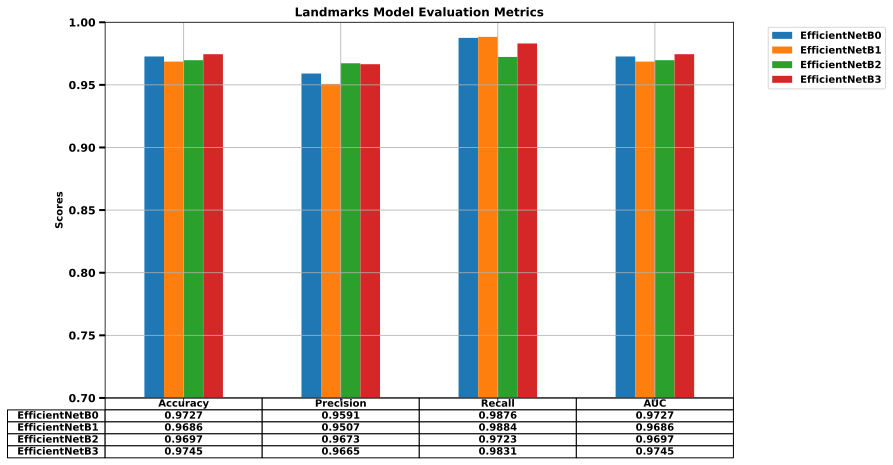

In [8]:
# creating a 2 dimensional dataframe out of the given data
results_df = pd.read_csv(os.path.join(".", result_folder, "landmark_prediction_results.csv"))
results_df = results_df.rename(columns={"Unnamed: 0": "Model"})


# Set the model names as the index for better labeling on the x-axis
results_df.set_index("Model", inplace=True)

results_df_transposed = results_df.transpose()

# Create a bar plot for the DataFrame
ax = results_df_transposed.plot(kind="bar", figsize=(12, 8))
ax.set_ylabel("Scores")
# ax.set_xlabel('Metrics')
ax.set_title("Landmarks Model Evaluation Metrics")

# Set the y-axis lower limit to 0.90
ax.set_ylim(0.70, 1.0)
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1), ncol=1)

# Show the plot
plt.grid()

# Bold the fonts in the graph
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams["axes.titleweight"] = "bold"
ax.tick_params(axis="y", which="major", labelsize=11, width=2, length=6)

# plt.xticks(rotation=45)
ax.set_xticklabels([])
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
table(ax, results_df.round(4), loc="bottom", cellLoc="center")
plt.show()

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.1


In [3]:
import keras

print("Keras version:", keras.__version__)

Keras version: 2.13.1
